<a href="https://colab.research.google.com/github/yyogesh0301/Heart-disease_prediction_ml_algorithms/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
from tensorflow.keras.models import Model, load_model

In [ ]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown

dataset1 = pd.read_csv("heart.csv")

Q1 = dataset1.quantile(0.25)
Q3 = dataset1.quantile(0.75)
IQR = Q3 - Q1
dataset = dataset1[~((dataset1 < (Q1 - 1.5 * IQR)) | (dataset1 > (Q3 + 1.5 * IQR))).any(axis=1)]

# Train Test split
predictors = dataset.drop("target", axis=1)
target = dataset["target"]

# K-Fold Cross-Validation with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=12)

# Model Fitting
models = [
    LogisticRegression(max_iter=1000),
    GaussianNB(),
    svm.SVC(kernel='linear'),
    KNeighborsClassifier(n_neighbors=7),
    DecisionTreeClassifier(random_state=12),
    RandomForestClassifier(random_state=12)
]

# Specify scoring metrics
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'accuracy': make_scorer(accuracy_score),
    'sensitivity': make_scorer(recall_score, pos_label=1),
    'specificity': make_scorer(recall_score, pos_label=0)
}

# Lists to store results
classifier_algorithms = []
mean_precision_scores = []
mean_recall_scores = []
mean_f1_scores = []
mean_accuracy_scores = []
mean_sensitivity_scores = []
mean_specificity_scores = []


In [ ]:
dataset1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
for i in dataset1[:][:]:
  print(i)


age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
target


**Displaying Results**

##            LogisticRegression           

Mean Precision: 0.86
Mean Recall: 0.92
Mean F1 Score: 0.89
Mean Accuracy: 0.87
Mean Sensitivity: 0.92
Mean Specificity: 0.82


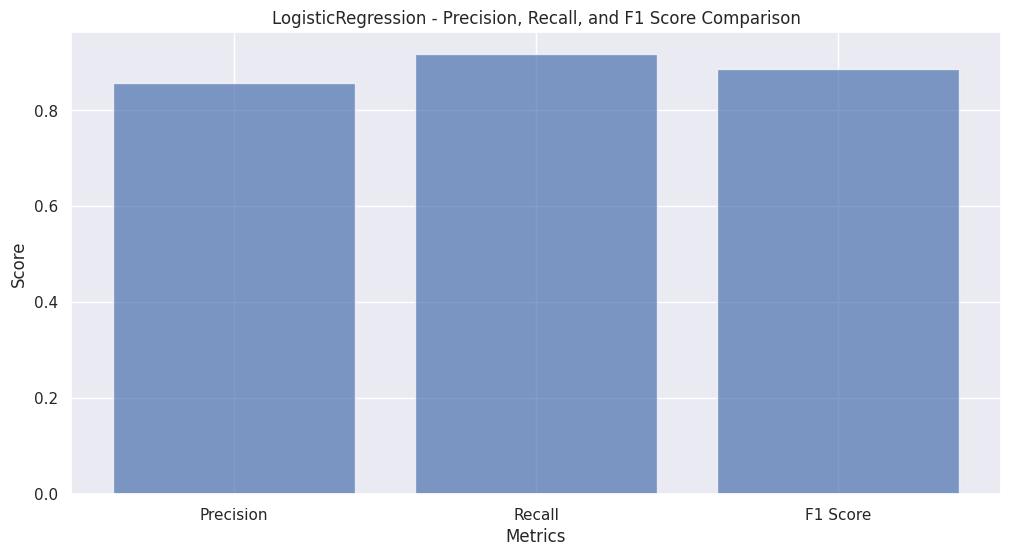

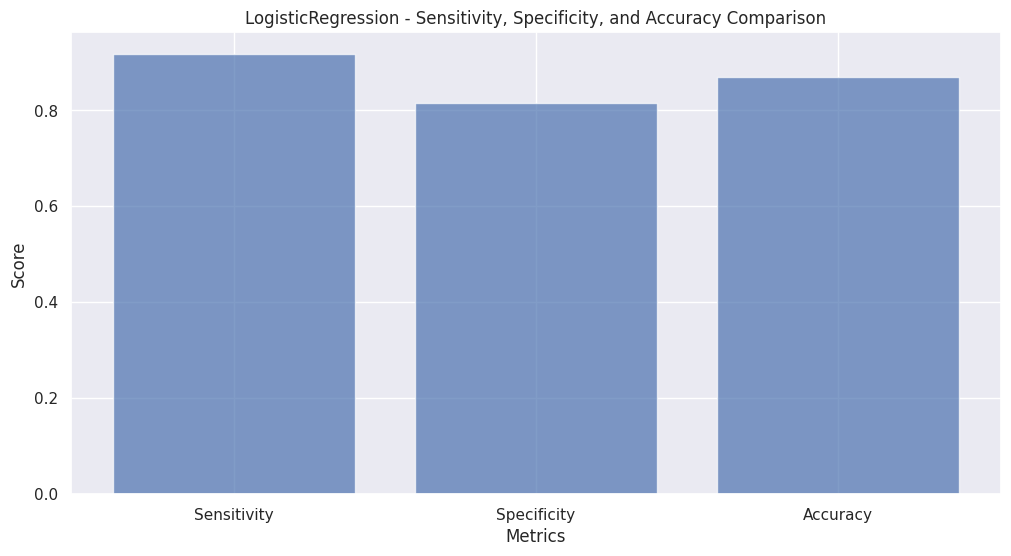

Saved LogisticRegression mdl after training as LogisticRegression_model.pkl


##            GaussianNB           

Mean Precision: 0.85
Mean Recall: 0.87
Mean F1 Score: 0.86
Mean Accuracy: 0.84
Mean Sensitivity: 0.87
Mean Specificity: 0.81


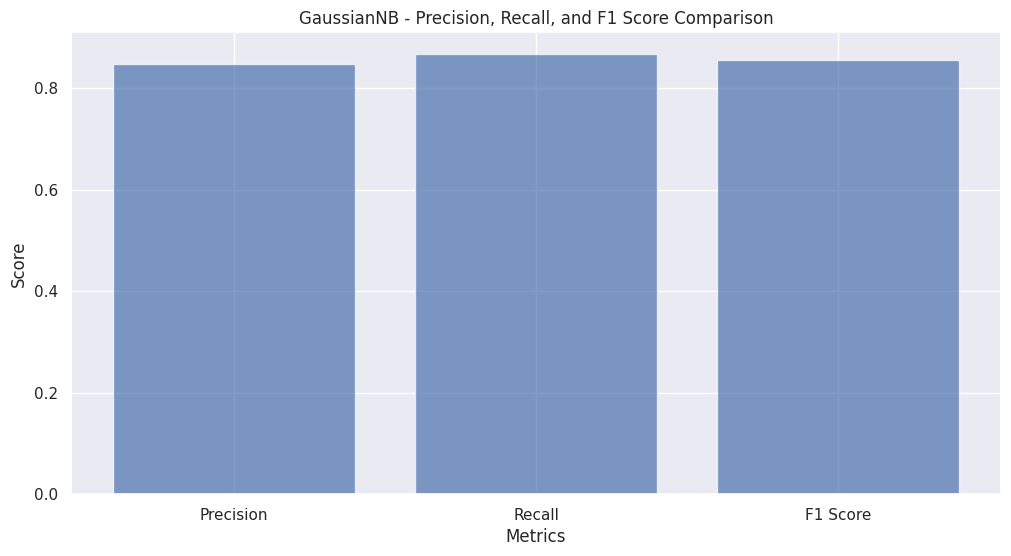

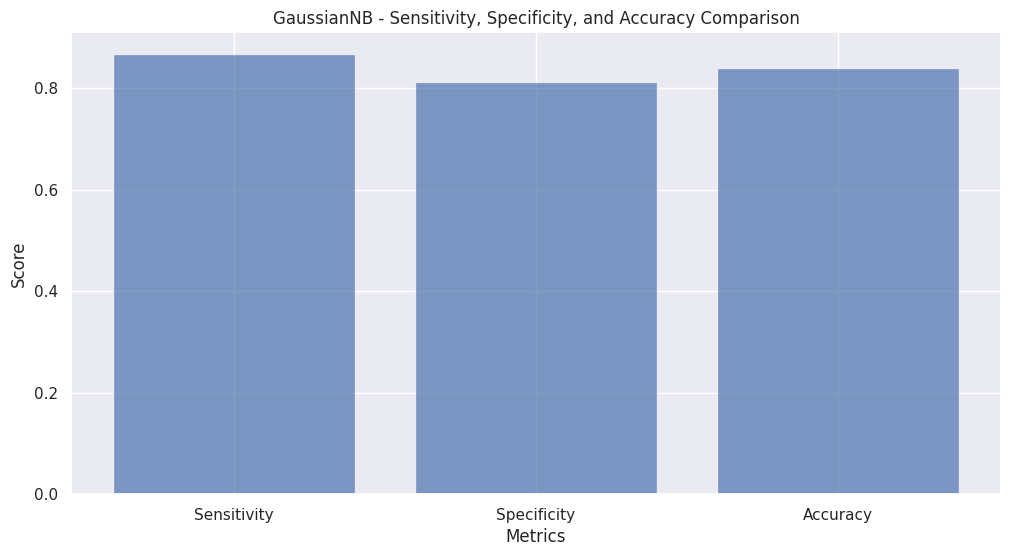

Saved GaussianNB mdl after training as GaussianNB_model.pkl


##            SVC           

Mean Precision: 0.85
Mean Recall: 0.92
Mean F1 Score: 0.88
Mean Accuracy: 0.86
Mean Sensitivity: 0.92
Mean Specificity: 0.80


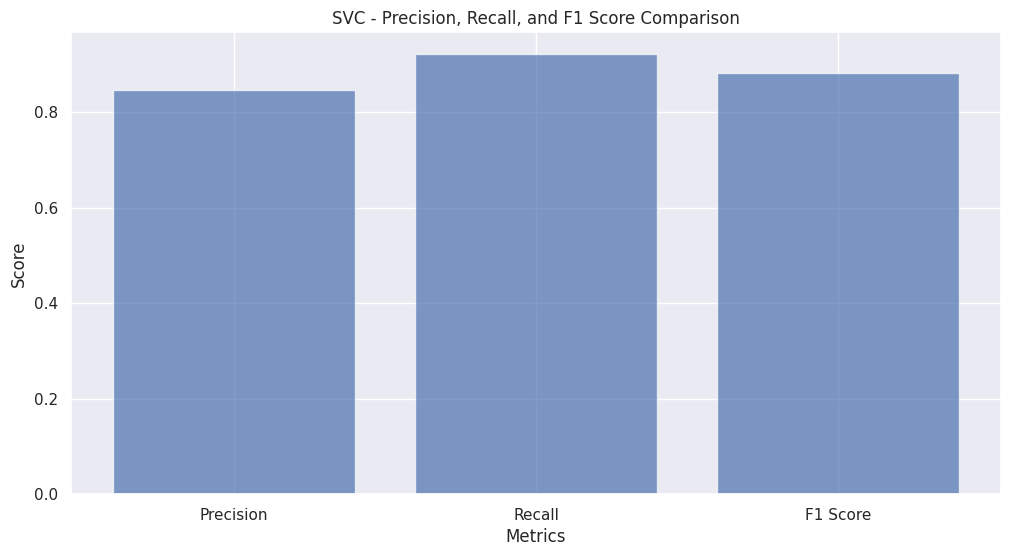

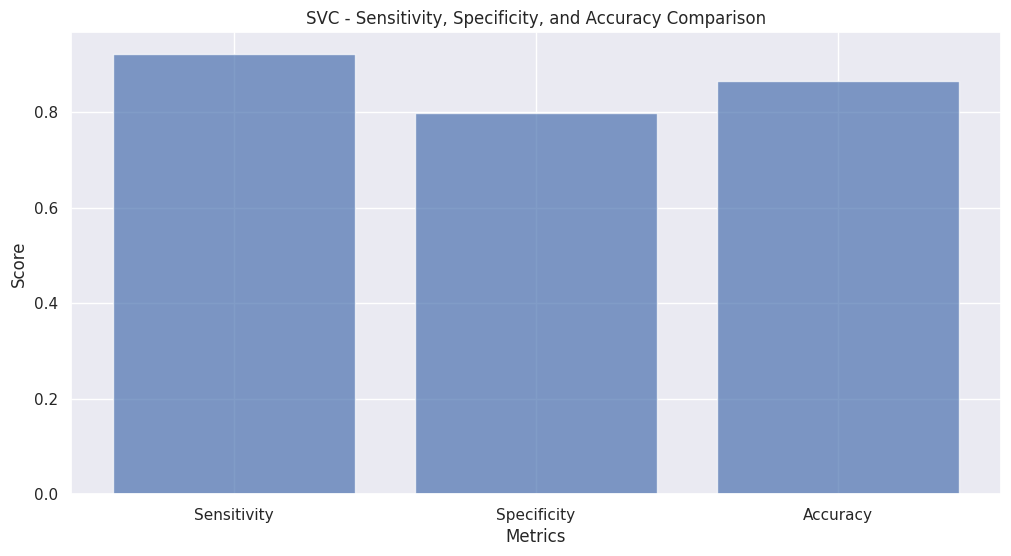

Saved SVC mdl after training as SVC_model.pkl


##            KNeighborsClassifier           

Mean Precision: 0.74
Mean Recall: 0.77
Mean F1 Score: 0.76
Mean Accuracy: 0.73
Mean Sensitivity: 0.77
Mean Specificity: 0.68


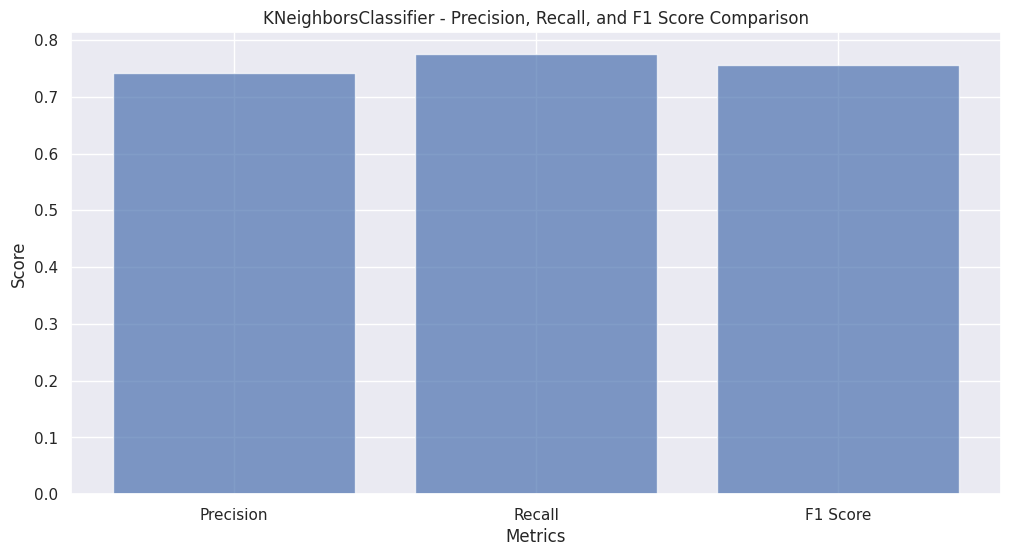

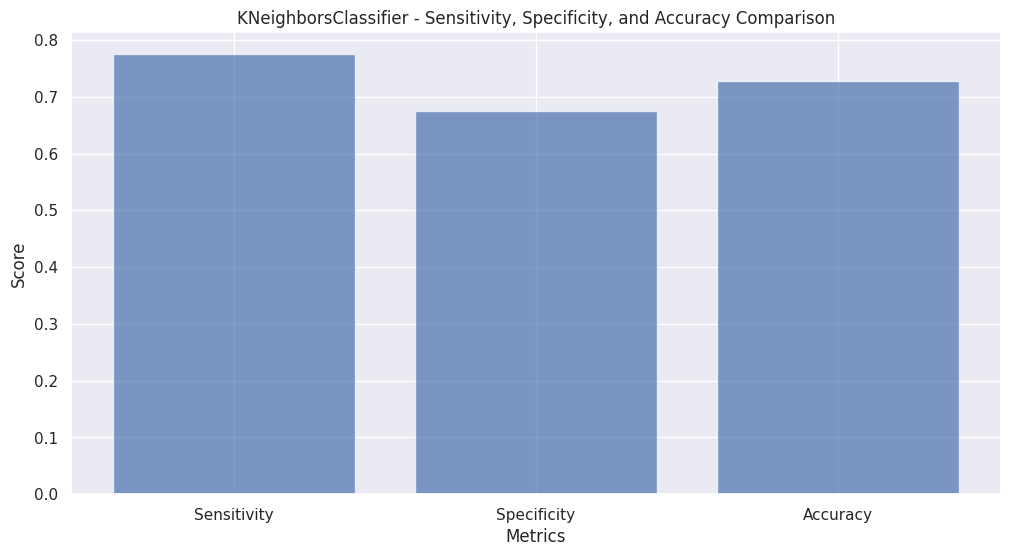

Saved KNeighborsClassifier mdl after training as KNeighborsClassifier_model.pkl


##            DecisionTreeClassifier           

Mean Precision: 1.00
Mean Recall: 0.99
Mean F1 Score: 0.99
Mean Accuracy: 0.99
Mean Sensitivity: 0.99
Mean Specificity: 1.00


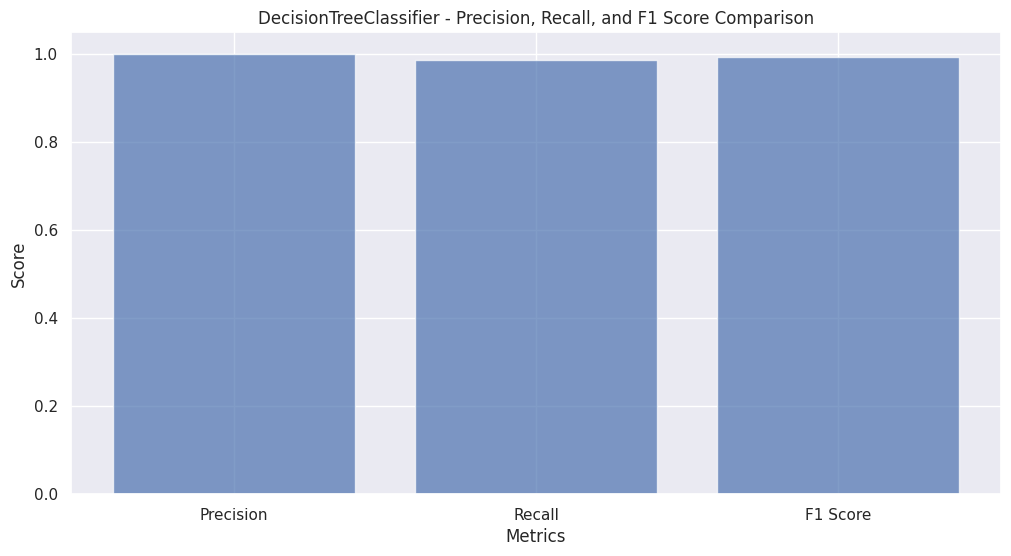

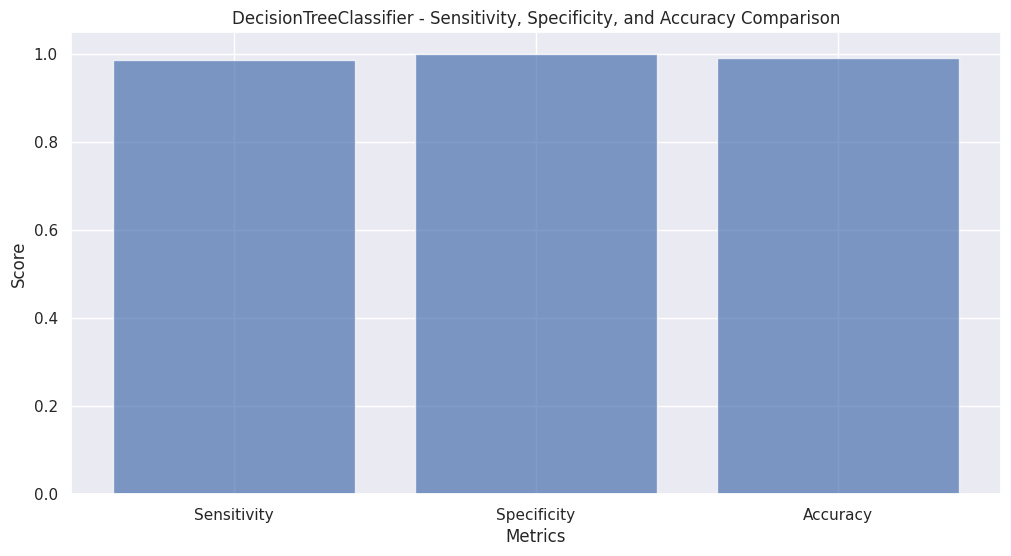

Saved DecisionTreeClassifier mdl after training as DecisionTreeClassifier_model.pkl


##            RandomForestClassifier           

Mean Precision: 1.00
Mean Recall: 0.97
Mean F1 Score: 0.99
Mean Accuracy: 0.98
Mean Sensitivity: 0.97
Mean Specificity: 1.00


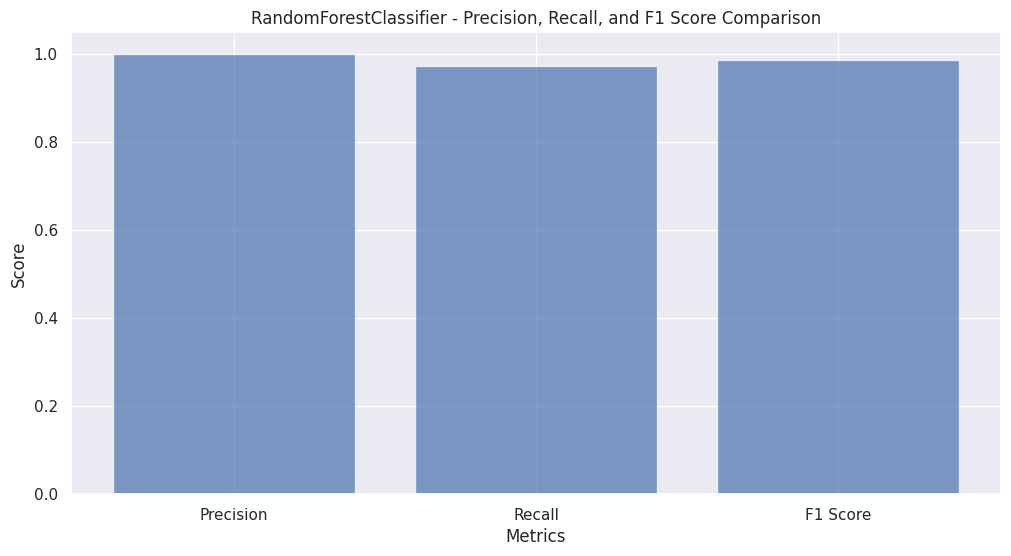

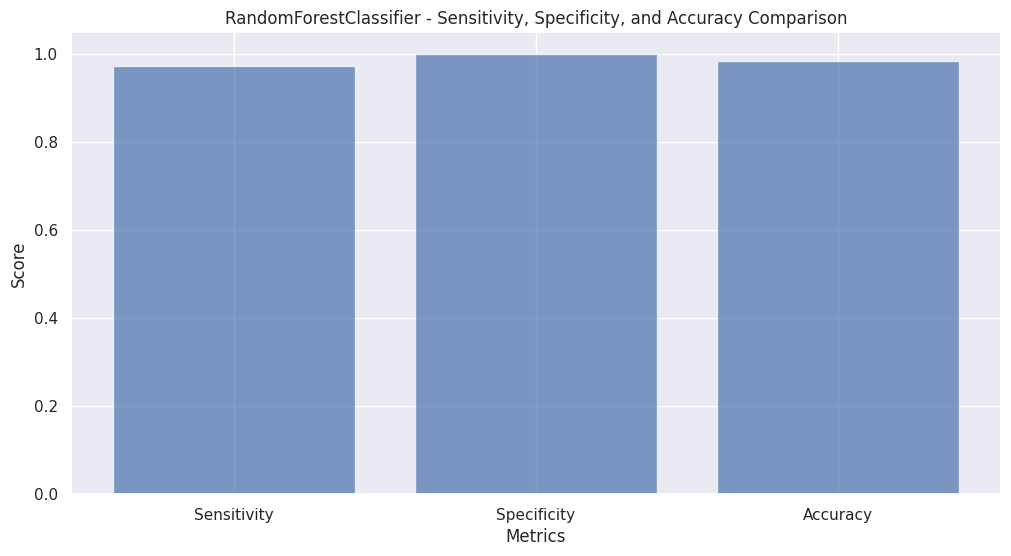

Saved RandomForestClassifier mdl after training as RandomForestClassifier_model.pkl


In [ ]:
import pickle
from IPython.display import Markdown

# Displaying results for each mdl and saving models
for mdl in models:
    model_name = mdl.__class__.__name__

    # heading
    display(Markdown(f"## {' '*10} {model_name} {' '*10}"))
    cv_results = cross_validate(mdl, predictors, target, cv=kf, scoring=scoring)

    # Store mean scores in the lists
    classifier_algorithms.append(model_name)
    mean_precision_scores.append(np.mean(cv_results['test_precision']))
    mean_recall_scores.append(np.mean(cv_results['test_recall']))
    mean_f1_scores.append(np.mean(cv_results['test_f1']))
    mean_accuracy_scores.append(np.mean(cv_results['test_accuracy']))
    mean_sensitivity_scores.append(np.mean(cv_results['test_sensitivity']))
    mean_specificity_scores.append(np.mean(cv_results['test_specificity']))

    # Printing mean metrics
    print("Mean Precision: {:.2f}".format(mean_precision_scores[-1]))
    print("Mean Recall: {:.2f}".format(mean_recall_scores[-1]))
    print("Mean F1 Score: {:.2f}".format(mean_f1_scores[-1]))
    print("Mean Accuracy: {:.2f}".format(mean_accuracy_scores[-1]))
    print("Mean Sensitivity: {:.2f}".format(mean_sensitivity_scores[-1]))
    print("Mean Specificity: {:.2f}".format(mean_specificity_scores[-1]))

    sns.set(rc={'figure.figsize': (12, 6)})

    plt.figure()
    plt.bar(["Precision", "Recall", "F1 Score"], [mean_precision_scores[-1], mean_recall_scores[-1], mean_f1_scores[-1]], alpha=0.7)
    plt.title(f'{model_name} - Precision, Recall, and F1 Score Comparison')
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.show()

    # Plot 2: Sensitivity, Specificity, and Accuracy
    plt.figure()
    plt.bar(["Sensitivity", "Specificity", "Accuracy"],
        [mean_sensitivity_scores[-1], mean_specificity_scores[-1], mean_accuracy_scores[-1]], alpha=0.7)
    plt.title(f'{model_name} - Sensitivity, Specificity, and Accuracy Comparison')
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.show()

    # Fit the mdl again to ensure it's fully trained before saving
    mdl.fit(predictors, target)
    model_filename = f"{model_name}_model.pkl"
    with open(model_filename, 'wb') as file:
        pickle.dump(mdl, file)
    print(f"Saved {model_name} mdl after training as {model_filename}")


In [ ]:

table1 = pd.DataFrame({
    'Classifier Algorithm': classifier_algorithms,
    'Sensitivity': mean_sensitivity_scores,
    'Specificity': mean_specificity_scores,
    'Accuracy': mean_accuracy_scores,
}).round(3)

table2 = pd.DataFrame({
    'Classifier Algorithm': classifier_algorithms,
    'Precision': mean_precision_scores,
    'Recall': mean_recall_scores,
    'F1 Score': mean_f1_scores
}).round(3)

# Print tables with the updated results
print("Updated Results for Sensitivity, Specificity, and Accuracy:")
print(tabulate(table1, headers='keys', tablefmt='pretty', showindex=True))

print("\nUpdated Results for Precision, Recall, and F1 Score:")
print(tabulate(table2, headers='keys', tablefmt='pretty', showindex=True))

Updated Results for Sensitivity, Specificity, and Accuracy:
+---+------------------------+-------------+-------------+----------+
|   |  Classifier Algorithm  | Sensitivity | Specificity | Accuracy |
+---+------------------------+-------------+-------------+----------+
| 0 |   LogisticRegression   |    0.917    |    0.816    |   0.87   |
| 1 |       GaussianNB       |    0.867    |    0.813    |   0.84   |
| 2 |          SVC           |    0.921    |    0.798    |  0.865   |
| 3 |  KNeighborsClassifier  |    0.775    |    0.675    |  0.727   |
| 4 | DecisionTreeClassifier |    0.986    |     1.0     |  0.992   |
| 5 | RandomForestClassifier |    0.974    |     1.0     |  0.984   |
+---+------------------------+-------------+-------------+----------+

Updated Results for Precision, Recall, and F1 Score:
+---+------------------------+-----------+--------+----------+
|   |  Classifier Algorithm  | Precision | Recall | F1 Score |
+---+------------------------+-----------+--------+---------

In [ ]:
table2

,Classifier Algorithm,Precision,Recall,F1 Score
0,LogisticRegression,0.858,0.917,0.885
1,GaussianNB,0.848,0.867,0.856
2,SVC,0.847,0.921,0.882
3,KNeighborsClassifier,0.743,0.775,0.756
4,DecisionTreeClassifier,1.000,0.986,0.993
5,RandomForestClassifier,1.000,0.974,0.987


In [ ]:
table1

,Classifier Algorithm,Sensitivity,Specificity,Accuracy
0,LogisticRegression,0.917,0.816,0.870
1,GaussianNB,0.867,0.813,0.840
2,SVC,0.921,0.798,0.865
3,KNeighborsClassifier,0.775,0.675,0.727
4,DecisionTreeClassifier,0.986,1.000,0.992
5,RandomForestClassifier,0.974,1.000,0.984


In [ ]:
pickled_model = pickle.load(open('DecisionTreeClassifier_model.pkl', 'rb'))


In [ ]:
pickled_model

DecisionTreeClassifier(random_state=12)

**SEE BELOW THIS IS HOW YOU HAVE TO ENTERED DATA TO PASS THE WARNING**

In [ ]:
# import pandas as pd
# from sklearn.tree import DecisionTreeClassifier
# import pickle

# # Example input data with feature names
# data = pd.DataFrame({
#     'feature1': [34],
#     'feature2': [1],
#     'feature3': [3],
#     'feature4': [70],
#     'feature5': [123],
#     'feature6': [1],
#     'feature7': [1],
#     'feature8': [155],
#     'feature9': [1],
#     'feature10': [2.1],
#     'feature11': [0],
#     'feature12': [0],
#     'feature13': [3]
# })

# # Load the pickled model
# with open('path_to_your_pickled_model.pkl', 'rb') as file:
#     pickled_model = pickle.load(file)

# # Make predictions using the loaded model
# predictions = pickled_model.predict(data)

# # Print or use the predictions
# print(predictions)


In [ ]:
predictions=pickled_model.predict([[52	,1,	0,	125	,212,	0	,1,	168,	0,	1,	2,	2 ,3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(predictions)

[0]
